# Devoir 6 : TALN

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%pip install lime

%load_ext autoreload
%autoreload 2
import sys
import os

py_file_location = "/content/nlp_code.py"
sys.path.append(os.path.abspath(py_file_location))
from nlp_code import preprocess_text, encode_sentiment
import torch
torch.cuda.is_available()
!pip install datasets transformers[torch] huggingface_hub
!apt-get install git-lfs

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#!cp drive/MyDrive/nlp_code.py .
#import nlp_code

In [3]:
# Ne modifiez pas cette cellule
np.random.seed(42)
# Chemin vers notre ensemble de données :
fichier = 'IMDB_dataset.csv'
# Chargement de notre ensemble de données :
df = pd.read_csv(fichier)
df.drop_duplicates(inplace = True)

Assurez-vous que nous traitons des critiques uniques.

# Tâche 2 : Prétraitement des données

Dans cette tâche, nous préparerons notre ensemble de données pour une analyse exploratoire des données (AED/EDA (Anglais)).

1-. Complétez la fonction `preprocess_text` contenue dans `nlp_code.py`. Cette fonction prend une critique (chaîne de caractères) en entrée et devrait renvoyer une version propre de la critique sans : balises HTML, signes de ponctuation, stopwords courants et jetons vides. De plus, tous les mots doivent être en minuscules et lemmatisés.

2-. Créez un nouveau DataFrame appelé `clean_df` avec les colonnes `clean_review` et `sentiment`. Vous devriez appliquer la fonction `preprocess_text` à toutes les critiques originales et stocker les critiques nettoyées dans la colonne `clean_review`.

3-. Affichez dans une nouvelle cellule les 5 premiers éléments de notre nouveau DataFrame.

In [4]:
clean_df = df.copy()
clean_df["clean_review"] = clean_df["review"].map(preprocess_text)
clean_df.drop(columns = ["review"], inplace = True)

In [5]:
clean_df.head(5)

,sentiment,clean_review
0,positive,one reviewer mentioned watching 1 oz episode h...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake think zombie ...
4,positive,petter mattei love time money visually stunnin...


In [6]:
print(preprocess_text(df["review"][0]))

one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz 

In [7]:
# Ne pas modifier ceci
new_df = encode_sentiment(clean_df)

In [8]:
# Ne pas modifier ceci
X = new_df['clean_review']
y = new_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(39665, 39665, 9917, 9917)

In [9]:
X_train = pd.DataFrame({"text": X_train, "labels": y_train})
X_test = pd.DataFrame({"text" : X_test, "labels" : y_test})
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")

  # Tâche 5 : Exploration d'un modèle Transformer

Dans cette section, je voudrais que vous `essayiez de` surpasser notre modèle précédent avec un modèle beaucoup plus complexe. Vous utiliserez un modèle transformateur appelé `distilBERT` pour cela (vous pouvez utiliser la bibliothèque HuggingFace pour l'implémenter). Dans votre rapport, je voudrais que vous :

1-. Mettez en œuvre le modèle distilBERT, entraînez-le et évaluez-le sur le même jeu d'entraînement que notre classifieur Naïve Bayes. Vous pouvez sauvegarder les ensembles de données prétraités sous forme de fichiers csv (avec les noms de colonnes text et labels) puis les charger à l'aide de la méthode load_dataset de la bibliothèque datasets. Vous devez faire attention au formatage des entrées pour ce modèle transformateur (son nom est : distilbert-base-uncased).

2-. Explorez 2 façons différentes d'ajuster le modèle (# epochs, learning rate, weight decay, etc.) pour améliorer les performances de classification (incluez le(s) tableau(x) des résultats obtenus par rapport aux approches explorées, indiquez la configuration qui a produit les meilleurs résultats). Je veux connaître en détail la méthodologie que vous avez suivie pour améliorer les performances du modèle. Par conséquent, j'attends une discussion raisonnable sur les approches que vous avez prises (je retirerai des points pour les changements aléatoires des hyperparamètres du modèle). **[Discussion]**

3-. Vous devrez inclure dans votre rapport votre précision("accuracy" et "precission"), rappel et scores F1 (discutez-les et comparez-les). De plus, vous devez inclure l'image de votre matrice de confusion sous forme de heatmap (meilleur modèle). Rapportez si les résultats obtenus sont bien meilleurs que ceux obtenus avec le classifieur Naïve Bayes. (Soutenez vos commentaires en comparant les scores et les heatmaps, j'attends une bonne quantité de discussion). **[Discussion]**


**Avertissements : Cette partie de l'assignation doit être effectuée dans Google Colab avec un environnement GPU, car les LLM sont difficiles à entraîner sur un ordinateur portable ou un PC classique (si vous avez un ordinateur puissant, n'hésitez pas à essayer). Je ne vous demande pas de vous acharner à améliorer de manière extrême un modèle qui ne s'améliore pas ou à suraméliorer un modèle qui fonctionne déjà mieux que le Naïve Bayes (concentrez vos efforts dans les limites des exigences attendues). Mon objectif est de vous donner de l'expérience dans l'entraînement de ce type de modèle et de vous faire remarquer combien de temps cela prend pour les entraîner. Parfois, facile, rapide et explicable/interprétable est meilleur que complexe, lent et difficile à expliquer/interpréter.**

Voici un [tutoriel](https://huggingface.co/blog/sentiment-analysis-python)

In [10]:
# Set DistilBERT tokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# Prepare the text inputs for the model
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [11]:
from datasets import load_dataset
X_train = load_dataset("csv", data_files = "X_train.csv", split="train[:100%]").map(preprocess_function, batched = True)
X_test = load_dataset("csv", data_files = "X_test.csv", split="train[:100%]").map(preprocess_function, batched = True)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/39665 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/9917 [00:00<?, ? examples/s]

In [17]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


def compute_metrics(eval_pred):
    load_accuracy = load_metric("accuracy")
    load_f1 = load_metric("f1")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    recall = recall_score(labels, predictions)
    precision = precision_score(labels, predictions)
    return {"accuracy": accuracy, "f1": f1, "recall": recall, "precision": precision}

In [19]:
from transformers import TrainingArguments, Trainer
!pip install accelerate -U

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.1,
    save_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [20]:
# Train the model
out = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,0.248900,0.237737,0.907432,0.908383,0.914223,0.902618


TrainOutput(global_step=2480, training_loss=0.28850269317626953, metrics={'train_runtime': 468.3527, 'train_samples_per_second': 84.69, 'train_steps_per_second': 5.295, 'total_flos': 3877161125096724.0, 'train_loss': 0.28850269317626953, 'epoch': 1.0})

In [16]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./results2",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,0.489400,0.540394,0.818393,0.815717,0.800723,0.831283
2,0.440900,1.013820,0.535243,0.142192,0.076738,0.967089
3,0.385000,1.015942,0.569023,0.256954,0.148453,0.954780


TrainOutput(global_step=7440, training_loss=0.46912075986144364, metrics={'train_runtime': 1399.2222, 'train_samples_per_second': 85.044, 'train_steps_per_second': 5.317, 'total_flos': 1.1613331202068092e+16, 'train_loss': 0.46912075986144364, 'epoch': 3.0})

<Axes: >

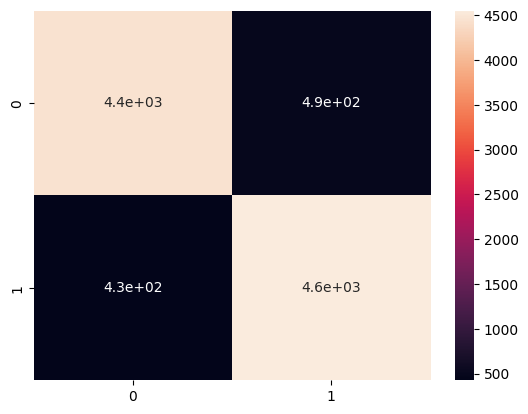

In [48]:
from sklearn.metrics import confusion_matrix
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset

y_pred = trainer.predict(X_test)
y_pred = y_pred.predictions.argmax(-1)
y_test = X_test["labels"]
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True)

<Axes: >

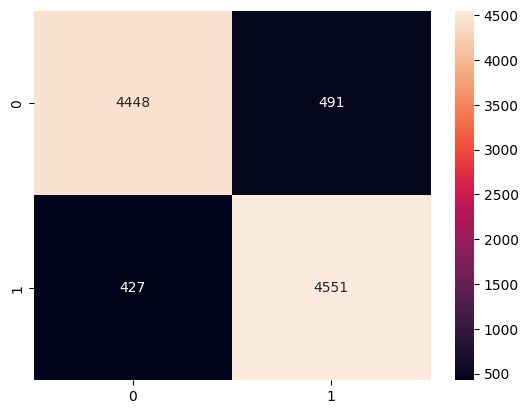

In [51]:
sns.heatmap(confusion, annot=True, fmt = '.0f')

In [54]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
training_args = TrainingArguments(
    output_dir="./results3",
    evaluation_strategy="epoch",
    learning_rate=2e-6,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.05,
    save_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Recall,Precision
1,0.317300,0.301964,0.878794,0.880849,0.892527,0.869472
2,0.266100,0.286196,0.883130,0.885100,0.896746,0.873752
3,0.252000,0.286112,0.886155,0.887111,0.891121,0.883138


TrainOutput(global_step=7440, training_loss=0.30993312199910483, metrics={'train_runtime': 1396.0988, 'train_samples_per_second': 85.234, 'train_steps_per_second': 5.329, 'total_flos': 1.1613331202068092e+16, 'train_loss': 0.30993312199910483, 'epoch': 3.0})